**Import libraries** <a class="anchor" id="7"></a>

[Table of Contents](#0.1)

In [ ]:


import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, \
                            classification_report, accuracy_score, \
                            recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.style.use("fivethirtyeight")

In [ ]:
import warnings

warnings.filterwarnings('ignore')

# Import dataset <a class="anchor" id="8"></a>



In [ ]:
data = '/content/drive/MyDrive/Car_Classification/car_evaluation.csv'

df = pd.read_csv(data, header=None)

NameError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Exploratory data analysis** <a class="anchor" id="9"></a>


In [ ]:
# Melihat dimensi dataset

df.shape

(1728, 7)

Data ini memiliki 1728 row dan 7 variabel

In [ ]:
# melihat head dataset

df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc




Bisa dilihat bahwa data ini belum memiliki nama pada kolom/variabelnya, untuk memudahkan analisa, maka kita akan beri nama 

In [ ]:
col_names = ['price', 'service', 'doors', 'capacity', 'luggage', 'security', 'decision']


df.columns = col_names

col_names

['price', 'service', 'doors', 'capacity', 'luggage', 'security', 'decision']

In [ ]:
# mari kita lihat lagi dataset setelah diberi nama

df.head()

,price,service,doors,capacity,luggage,security,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Nah sekarang kolom-kolomnya sudah terdefinisi dengan jelas kan lebih enak untuk dianalisa

Selanjutnya untuk lebih memudahkan hasil analisa, maka kita akan mengubah unique value kolom decision yang akan kita jadikan target variabel menjadi hanya memiliki dua unique value, yakni 'buy' dan 'not buy'

In [ ]:

df= df.replace({'decision': {'unacc' : 'not buy', 'acc' : 'buy' , 'good' : 'buy', 'vgood' : 'buy'}})

In [ ]:
#mari kita cek hasil perubahannya dengan function describe()
df.describe().T

,count,unique,top,freq
price,1728,4,vhigh,432
service,1728,4,vhigh,432
doors,1728,4,2,432
capacity,1728,3,2,576
luggage,1728,3,small,576
security,1728,3,low,576
decision,1728,2,not buy,1210


Selanjutnya mari kita lihat apakah ada null value dalam data kita

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   price     1728 non-null   object
 1   service   1728 non-null   object
 2   doors     1728 non-null   object
 3   capacity  1728 non-null   object
 4   luggage   1728 non-null   object
 5   security  1728 non-null   object
 6   decision  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
df.isnull().sum()

price       0
service     0
doors       0
capacity    0
luggage     0
security    0
decision    0
dtype: int64

Terlihat bahwa data kita sudah clean


Sekarang mari kita cek frekuensi semua value

In [ ]:
col_names = ['price', 'service', 'doors', 'capacity', 'luggage', 'security', 'decision']


for col in col_names:
    
    print(df[col].value_counts())


vhigh    432
high     432
med      432
low      432
Name: price, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: service, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: capacity, dtype: int64
small    576
med      576
big      576
Name: luggage, dtype: int64
low     576
med     576
high    576
Name: security, dtype: int64
not buy    1210
buy         518
Name: decision, dtype: int64


In [ ]:
#Selanjutnya kita akan memisahkan variabel numerical & categorical

numerical_features = df.select_dtypes(include="number").columns.tolist()
categorical_features = df.select_dtypes(include="object").columns.tolist()
print(numerical_features)
print(categorical_features)

[]
['price', 'service', 'doors', 'capacity', 'luggage', 'security', 'decision']


### Summary variables


- Terdapat 7 variabel dalam dataset dan kesemuanya adalah categorical

- Variabel-variabelnya meliputi 'price', 'service', 'doors', 'capacity', 'luggage', 'security', dan 'decision

- 'decision' adalah target variable.

### Deskripsi visualisasi

In [ ]:
#visualisasi variabel price
price_order = df.price.value_counts().index
plt.figure(figsize=(12, 6))
sns.countplot(
    x="price",
    data=df,
    order=price_order,
    palette=["#29B5BF"] + (len(price_order)-1)*["#777777"]
)
plt.grid(False)
plt.show()

NameError: ignored

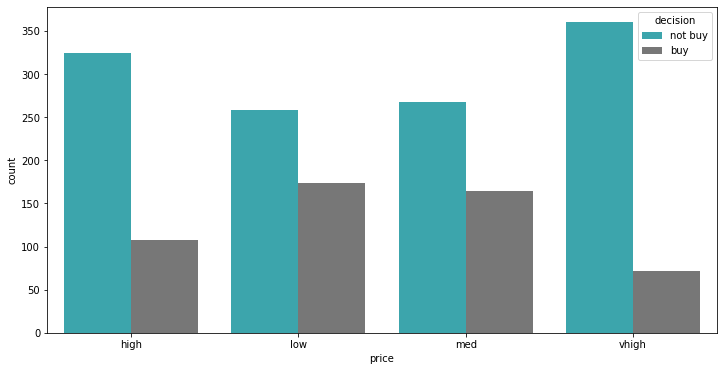

In [ ]:
#visualisasi variabel price dibandingkan dengan variabel decision
plt.figure(figsize=(12, 6))
sns.countplot(
    x="price",
    data=df,
    hue="decision",
    order=sorted(df.price.unique()),
    palette=["#29B5BF"] + ["#777777"]
)
plt.grid(False)
plt.show()

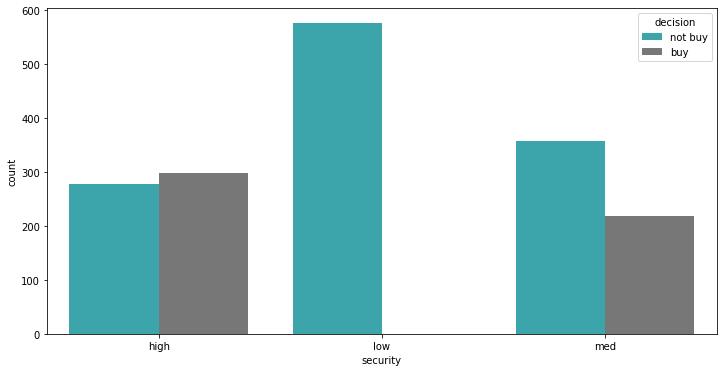

In [ ]:
#Visualisasi variabel security dibandingkan dengan security
plt.figure(figsize=(12, 6))
sns.countplot(
    x="security",
    data=df,
    hue="decision",
    order=sorted(df.security.unique()),
    palette=["#29B5BF"] + ["#777777"]
)
plt.grid(False)
plt.show()

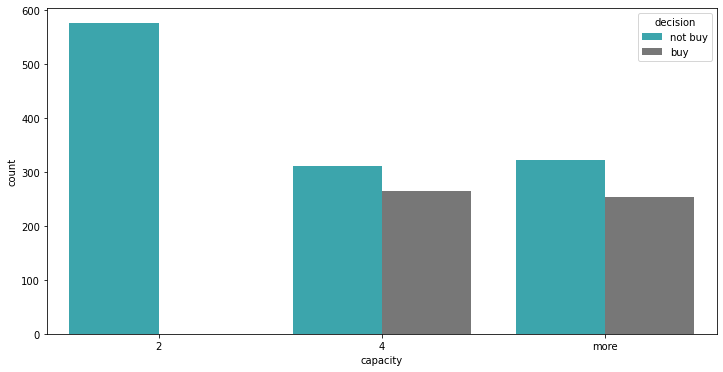

In [ ]:
#visualisasi variabel capacity dibandingkan dengan decision
plt.figure(figsize=(12, 6))
sns.countplot(
    x="capacity",
    data=df,
    hue="decision",
    order=sorted(df.capacity.unique()),
    palette=["#29B5BF"] + ["#777777"]
)
plt.grid(False)
plt.show()

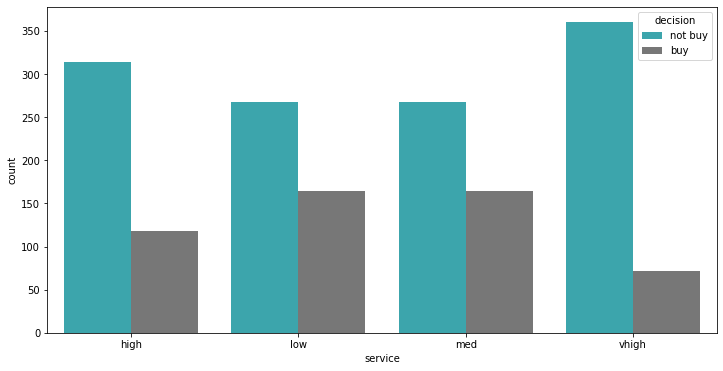

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(
    x="service",
    data=df,
    hue="decision",
    order=sorted(df.service.unique()),
    palette=["#29B5BF"] + ["#777777"]
)
plt.grid(False)
plt.show()

Define features dan target variabel


In [ ]:
X = df.drop(['decision'], axis=1)

y = df['decision']

#Split data menjadi data training dan data testing



In [ ]:
# split X and y menjadi training and testing sets,

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)  #komposisi yang kami pakai train=0.67 & test =0.33


In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1157, 6), (571, 6))

# **Encoding data** <a class="anchor" id="12"></a>

Karena data kita adalah berupa categorical, maka kita harus encoding menjadi numerical


In [ ]:
# check data types in X_train

X_train.dtypes

price       int64
service     int64
doors       int64
capacity    int64
luggage     int64
security    int64
dtype: object

In [ ]:
pip install category_encoders

In [ ]:
# import category encoders

import category_encoders as ce

In [ ]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['price', 'service', 'doors', 'capacity', 'luggage', 'security'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

Mari kita lihat hasilnya

In [ ]:
X_train.head()

,price,service,doors,capacity,luggage,security
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [ ]:
X_train.describe()

,price,service,doors,capacity,luggage,security
count,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000
mean,2.505618,2.507347,2.496975,1.995678,2.005186,1.996543
std,1.119663,1.123509,1.110363,0.808143,0.814004,0.815075
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000
75%,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000
max,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000


In [ ]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1157.0,2.505618,1.119663,1.0,2.0,3.0,4.0,4.0
service,1157.0,2.507347,1.123509,1.0,2.0,3.0,4.0,4.0
doors,1157.0,2.496975,1.110363,1.0,2.0,3.0,3.0,4.0
capacity,1157.0,1.995678,0.808143,1.0,1.0,2.0,3.0,3.0
luggage,1157.0,2.005186,0.814004,1.0,1.0,2.0,3.0,3.0
security,1157.0,1.996543,0.815075,1.0,1.0,2.0,3.0,3.0


In [ ]:
X_test.head()

,price,service,doors,capacity,luggage,security
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


In [ ]:
X_test.describe()

,price,service,doors,capacity,luggage,security
count,571.000000,571.000000,571.00000,571.000000,571.000000,571.000000
mean,2.488616,2.485114,2.50613,2.008757,1.989492,2.007005
std,1.116602,1.108677,1.13534,0.834514,0.822850,0.820753
min,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
25%,1.000000,1.500000,1.00000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000
75%,3.000000,3.000000,4.00000,3.000000,3.000000,3.000000
max,4.000000,4.000000,4.00000,3.000000,3.000000,3.000000


# **Next, we are going to rescale the data**

In [ ]:
scaler =StandardScaler()
scaler.fit(X_train)

# Buat variabel yang sudah discaling dengan StandardScaler() (untuk data train, dan data test)
X_train_scaled = pd.DataFrame(
    scaler.transform(X_train),
    columns=X_train.columns
)

X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns
)


# Dan jeng jeng jenggg....

In [ ]:
X_train_scaled.head()

,price,service,doors,capacity,luggage,security
0,-1.345288,-1.342222,-1.348768,-1.23259,-1.235400,-1.223167
1,-0.451776,-1.342222,-1.348768,0.00535,-0.006374,-1.223167
2,-1.345288,-0.451768,-1.348768,-1.23259,-0.006374,0.004243
3,0.441736,0.438685,-0.447772,-1.23259,-0.006374,0.004243
4,1.335249,0.438685,0.453223,-1.23259,-0.006374,0.004243


In [ ]:
#rescaling sekaligus juga mengubah nilai mean, median, standar deviasi, juga variancenya
X_train_scaled.describe()

,price,service,doors,capacity,luggage,security
count,1.157000e+03,1.157000e+03,1.157000e+03,1.157000e+03,1.157000e+03,1.157000e+03
mean,-8.847240e-17,5.373595e-18,2.291454e-16,3.761516e-16,2.037288e-16,-8.924005e-16
std,1.000432e+00,1.000432e+00,1.000432e+00,1.000432e+00,1.000432e+00,1.000432e+00
min,-1.345288e+00,-1.342222e+00,-1.348768e+00,-1.232590e+00,-1.235400e+00,-1.223167e+00
25%,-4.517758e-01,-4.517684e-01,-4.477723e-01,-1.232590e+00,-1.235400e+00,-1.223167e+00
50%,4.417364e-01,4.386848e-01,4.532235e-01,5.349782e-03,-6.373515e-03,4.243426e-03
75%,1.335249e+00,1.329138e+00,4.532235e-01,1.243289e+00,1.222653e+00,1.231654e+00
max,1.335249e+00,1.329138e+00,1.354219e+00,1.243289e+00,1.222653e+00,1.231654e+00


# `Sekarang data kita sudah siap untuk dimodelkan

# **14. Decision Tree Classifier with criterion entropy** <a class="anchor" id="14"></a>

[Table of Contents](#0.1)

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)


# fit the model
clf_en.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

### Predict the Test set results with criterion entropy

In [ ]:
y_pred_en = clf_en.predict(X_test_scaled)
y_pred_en

array(['not buy', 'buy', 'not buy', 'buy', 'not buy', 'buy', 'not buy',
       'not buy', 'buy', 'not buy', 'buy', 'buy', 'buy', 'not buy',
       'not buy', 'not buy', 'not buy', 'not buy', 'not buy', 'buy',
       'not buy', 'buy', 'buy', 'not buy', 'buy', 'buy', 'not buy',
       'not buy', 'not buy', 'not buy', 'buy', 'not buy', 'buy',
       'not buy', 'buy', 'buy', 'buy', 'not buy', 'not buy', 'not buy',
       'not buy', 'not buy', 'buy', 'buy', 'buy', 'buy', 'not buy',
       'not buy', 'not buy', 'not buy', 'buy', 'not buy', 'buy',
       'not buy', 'not buy', 'not buy', 'not buy', 'not buy', 'not buy',
       'buy', 'not buy', 'buy', 'not buy', 'not buy', 'buy', 'buy',
       'not buy', 'buy', 'buy', 'not buy', 'not buy', 'not buy',
       'not buy', 'not buy', 'buy', 'buy', 'not buy', 'not buy',
       'not buy', 'not buy', 'buy', 'not buy', 'not buy', 'buy', 'buy',
       'buy', 'not buy', 'buy', 'buy', 'buy', 'not buy', 'buy', 'not buy',
       'not buy', 'not buy', 'buy',

### Check accuracy score with criterion entropy

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9282


### Compare the train-set and test-set accuracy


Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [ ]:
y_pred_train_en = clf_en.predict(X_train_scaled)

y_pred_train_en

array(['not buy', 'not buy', 'buy', ..., 'buy', 'not buy', 'buy'],
      dtype=object)

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.9023


### Check for overfitting and underfitting

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train_scaled, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test_scaled, y_test)))

Training set score: 0.9023
Test set score: 0.9282


### Visualize decision-trees

In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

ValueError: ignored

<Figure size 864x576 with 0 Axes>

### Visualize decision-trees with graphviz

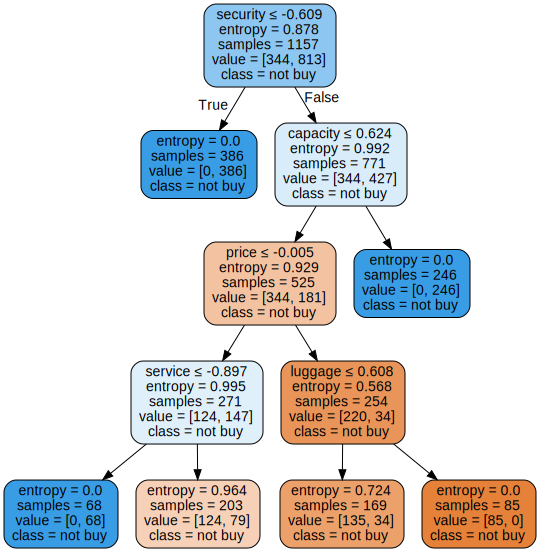

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf_en, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.


But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making. 


We have another tool called `Confusion matrix` that comes to our rescue.

# Confusion Matrix & Classification Report

              precision    recall  f1-score   support

         buy       0.81      1.00      0.89       174
     not buy       1.00      0.90      0.95       397

    accuracy                           0.93       571
   macro avg       0.90      0.95      0.92       571
weighted avg       0.94      0.93      0.93       571



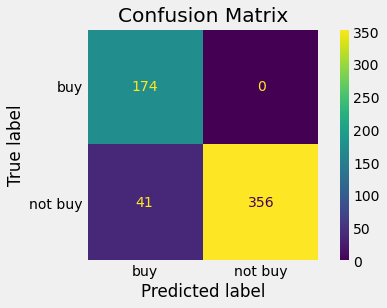

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, \
                            classification_report

print(classification_report(y_test, y_pred_en))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_en)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

In [ ]:
import joblib
joblib.dump(clf_en,'Model_CLF.ml')

['Model_CLF.ml']

# **DEPLOYMENT**

In [ ]:
#Baris data yang memiliki hasil buy
df.loc[295]

price       vhigh
service       med
doors           4
capacity     more
luggage       big
security      med
decision      buy
Name: 295, dtype: object

In [ ]:
#Hasil Encodingnya
X_train.loc[295]

price       vhigh
service       med
doors           4
capacity     more
luggage       big
security      med
Name: 295, dtype: object

In [ ]:
#Ujicoba agar hasil prediksi 'buy'
import joblib
model = joblib.load('/content/drive/MyDrive/Colab Notebooks/Final Assignment intro Data Analytics/Model_CLF.ml')
model.predict([[1,4,4,1,3,3]])

FileNotFoundError: ignored

In [ ]:
#Ujicoba agar hasil prediksi 'not buy'
import joblib
model = joblib.load('/content/drive/MyDrive/Colab Notebooks/Final Assignment intro Data Analytics/Model_CLF.ml')
model.predict([[1,4,4,1,3,1]])